## Import Python Libraries

In [41]:
# for generating random variables
import numpy as np

# for plotting
import matplotlib.pyplot as plt 

# for managing data
import pandas as pd

# for plotting
import seaborn as sns 

# for t-tests and ANOVA
import scipy.stats as stats

# for learning algorithms
import sklearn

# for encoding categorical variables
import sklearn.preprocessing as pre

# for splitting into training and test sets
import sklearn.model_selection as mod

%matplotlib inline

## Load the Dataset into Pandas

In [42]:
# read in opel_corsa_01 csv file
df = pd.read_csv("opel_corsa_01.csv", sep=";")
# display the first 5 rows of the dataframe
df.head()

,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [43]:
# check for any missing values in the dataset - a clean dataset is required for analysis
df.isnull().sum()

Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64

There are no missing values

In [44]:
# check the data type of all the variables
df.dtypes

Unnamed: 0                     int64
AltitudeVariation            float64
VehicleSpeedInstantaneous    float64
VehicleSpeedAverage          float64
VehicleSpeedVariance         float64
VehicleSpeedVariation        float64
LongitudinalAcceleration     float64
EngineLoad                   float64
EngineCoolantTemperature       int64
ManifoldAbsolutePressure       int64
EngineRPM                      int64
MassAirFlow                  float64
IntakeAirTemperature           int64
VerticalAcceleration         float64
FuelConsumptionAverage       float64
roadSurface                   object
traffic                       object
drivingStyle                  object
dtype: object

A mixture of datatypes - integers, floats and objects.

In [45]:
# count the number of categories in roadSurface variable
pd.value_counts(df.roadSurface)

SmoothCondition    6873
UnevenCondition     165
Name: roadSurface, dtype: int64

The roadSurface output variable has two categories - SmoothCondition and UnevenCondition.

In [46]:
# count the number of categories in drivingStyle variable
pd.value_counts(df.drivingStyle)

EvenPaceStyle      5751
AggressiveStyle    1287
Name: drivingStyle, dtype: int64

The drivingStyle output variable has two categories - EvenPaceStyle and AggressiveStyle.

In [47]:
# count the number of categories in traffic variable
pd.value_counts(df.traffic)

LowCongestionCondition       6461
HighCongestionCondition       449
NormalCongestionCondition     128
Name: traffic, dtype: int64

The traffic output variable has three categories - LowCongestionCondition, HighCongestionCondition and NormalCongestionCondition.

In [48]:
# drop the first column, drivingStyle output column and traffic output column from the dataframe
corsa1 = df.drop(columns=['Unnamed: 0', 'drivingStyle', 'traffic'], axis=1)
# display the first 5 rows of corsa1
corsa1.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,SmoothCondition
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,SmoothCondition
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,SmoothCondition
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,SmoothCondition
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,SmoothCondition


In [49]:
# import sklearn LabelEncoder to encode category variable roadSurface
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
corsa1["roadSurfaceCode"] = lb_make.fit_transform(corsa1["roadSurface"])
corsa1.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,roadSurfaceCode
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,SmoothCondition,0
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,SmoothCondition,0
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,SmoothCondition,0
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,SmoothCondition,0
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,SmoothCondition,0


In [50]:
# check the encoding has worked
corsa1.dtypes

AltitudeVariation            float64
VehicleSpeedInstantaneous    float64
VehicleSpeedAverage          float64
VehicleSpeedVariance         float64
VehicleSpeedVariation        float64
LongitudinalAcceleration     float64
EngineLoad                   float64
EngineCoolantTemperature       int64
ManifoldAbsolutePressure       int64
EngineRPM                      int64
MassAirFlow                  float64
IntakeAirTemperature           int64
VerticalAcceleration         float64
FuelConsumptionAverage       float64
roadSurface                   object
roadSurfaceCode                int32
dtype: object

roadSurfaceCode is datatype int32.

In [54]:
corsa2 = corsa1.drop(['roadSurface'], axis=1)
corsa2.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurfaceCode
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,0
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,0
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,0
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,0
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,0


### Descriptive Statistics
Now that the dataset has been loaded into a Panda's dataframe, I will further analyse the dataset to learn more about it. The Panda's describe function produces the descriptive statistics on the dataset. The mean, standard deviation, maximum number, minimum number, 25% quartile range (median), 50% quartile range and 75% quartile range are produced for each of the 14 numeric variables.

In [55]:
# descriptive statistics are obtained using the describe function. Adding the .T swaps the rows and columns.
corsa2.describe().T

,count,mean,std,min,25%,50%,75%,max
AltitudeVariation,7038.0,-0.675845,1.691601,-9.200012,-1.500000,-0.399963,0.100037,5.200012
VehicleSpeedInstantaneous,7038.0,36.428319,32.901312,0.000000,8.782019,29.273399,54.043198,124.749725
VehicleSpeedAverage,7038.0,36.723932,29.366391,0.000000,16.698035,28.312631,47.595544,121.330733
VehicleSpeedVariance,7038.0,213.004353,205.717663,0.000000,54.333652,144.864363,299.377339,1051.789888
VehicleSpeedVariation,7038.0,-0.029563,2.390997,-17.789218,-0.900722,0.000000,0.900721,12.384899
LongitudinalAcceleration,7038.0,0.143530,0.744697,-2.380000,-0.339800,0.140800,0.683600,2.360000
EngineLoad,7038.0,26.487416,19.462750,0.000000,13.725491,25.490196,34.901962,100.000000
EngineCoolantTemperature,7038.0,77.924979,7.076616,40.000000,79.000000,80.000000,81.000000,85.000000
ManifoldAbsolutePressure,7038.0,116.234157,20.660674,98.000000,102.000000,109.000000,122.000000,252.000000
EngineRPM,7038.0,1569.145354,551.406613,752.000000,936.000000,1659.500000,2033.000000,3104.000000


It is difficult to obtain a clear picture of the dataset using the basic raw descriptive statistics - it is not very informative in this state. Visualisation tools provide a much better way to analyse the dataset and will give a better understanding of the data.

### Visualisations

Visual tools such as histograms, boxplots and scatterplots make it easier to visualise the distribution of variables.



In [56]:
list(corsa2.columns)

['AltitudeVariation',
 'VehicleSpeedInstantaneous',
 'VehicleSpeedAverage',
 'VehicleSpeedVariance',
 'VehicleSpeedVariation',
 'LongitudinalAcceleration',
 'EngineLoad',
 'EngineCoolantTemperature',
 'ManifoldAbsolutePressure',
 'EngineRPM',
 'MassAirFlow',
 'IntakeAirTemperature',
 'VerticalAcceleration',
 'FuelConsumptionAverage',
 'roadSurfaceCode']

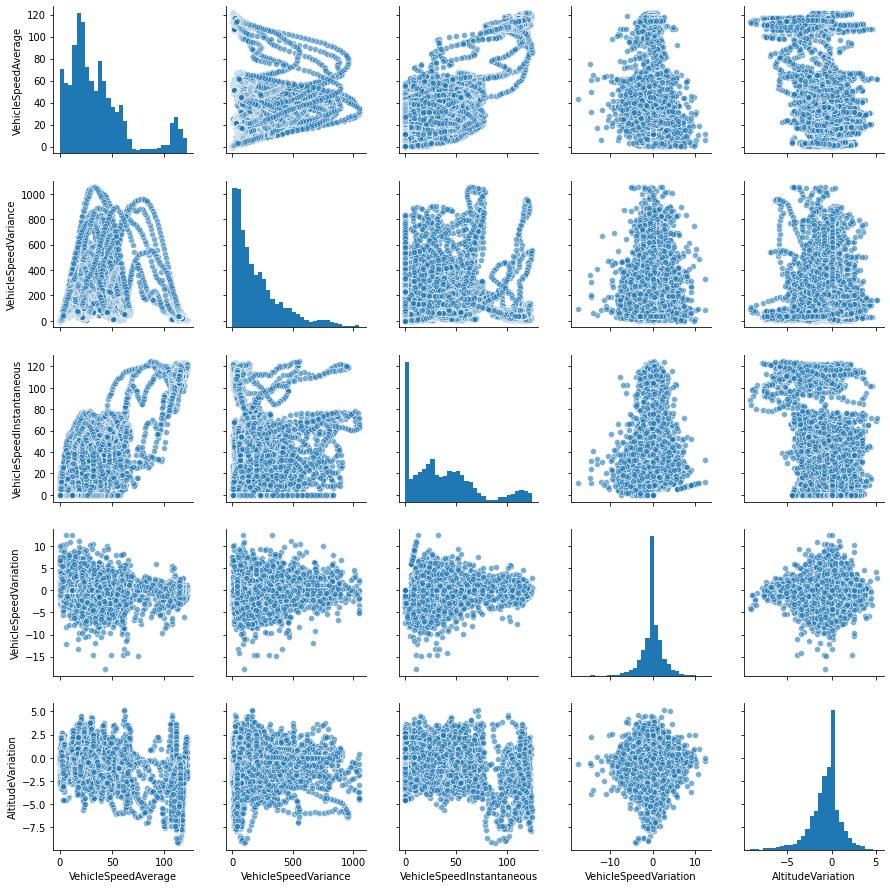

In [59]:
# create a variable called cols with a list of the input variables
cols = ['VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedInstantaneous', 'VehicleSpeedVariation', 'AltitudeVariation']

# create pairplots on the list of variables in cols
sns.pairplot(corsa2[cols],
plot_kws={'alpha': 0.6},
diag_kws={'bins': 30})

plt.show()

In [58]:
# run the Panda's corr function on the corsa2 dataframe - method Spearman
corsa2.corr(method='spearman')

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurfaceCode
AltitudeVariation,1.000000,-0.319551,-0.250295,-0.014411,0.030279,-0.039759,0.053917,-0.033505,-0.221076,-0.250762,-0.245479,-0.062743,0.040391,0.169858,-0.108751
VehicleSpeedInstantaneous,-0.319551,1.000000,0.705998,0.002011,0.079243,-0.229822,-0.020170,0.208261,0.780221,0.846458,0.812600,0.197765,0.250414,-0.453682,0.109024
VehicleSpeedAverage,-0.250295,0.705998,1.000000,0.086737,-0.083996,0.168101,0.012007,0.074315,0.468038,0.503367,0.508949,0.009103,-0.132582,-0.654158,0.152310
VehicleSpeedVariance,-0.014411,0.002011,0.086737,1.000000,0.040557,-0.094234,-0.044350,0.033921,0.031496,0.037355,0.059351,-0.116390,0.060504,-0.117990,0.091133
VehicleSpeedVariation,0.030279,0.079243,-0.083996,0.040557,1.000000,-0.293549,0.422436,-0.023603,0.419781,0.288914,0.315501,0.198793,0.250819,0.030391,-0.001855
LongitudinalAcceleration,-0.039759,-0.229822,0.168101,-0.094234,-0.293549,1.000000,-0.082985,0.089289,-0.288621,-0.320015,-0.295146,-0.123280,-0.848036,-0.129249,-0.068262
EngineLoad,0.053917,-0.020170,0.012007,-0.044350,0.422436,-0.082985,1.000000,0.036234,0.252521,0.058981,0.142899,0.148695,0.075072,-0.022496,-0.037870
EngineCoolantTemperature,-0.033505,0.208261,0.074315,0.033921,-0.023603,0.089289,0.036234,1.000000,0.183780,0.173078,0.125216,0.182893,0.023757,-0.206247,-0.246366
ManifoldAbsolutePressure,-0.221076,0.780221,0.468038,0.031496,0.419781,-0.288621,0.252521,0.183780,1.000000,0.855756,0.926622,0.175393,0.312765,-0.286088,0.007619
EngineRPM,-0.250762,0.846458,0.503367,0.037355,0.288914,-0.320015,0.058981,0.173078,0.855756,1.000000,0.876982,0.297947,0.319261,-0.332852,0.091701


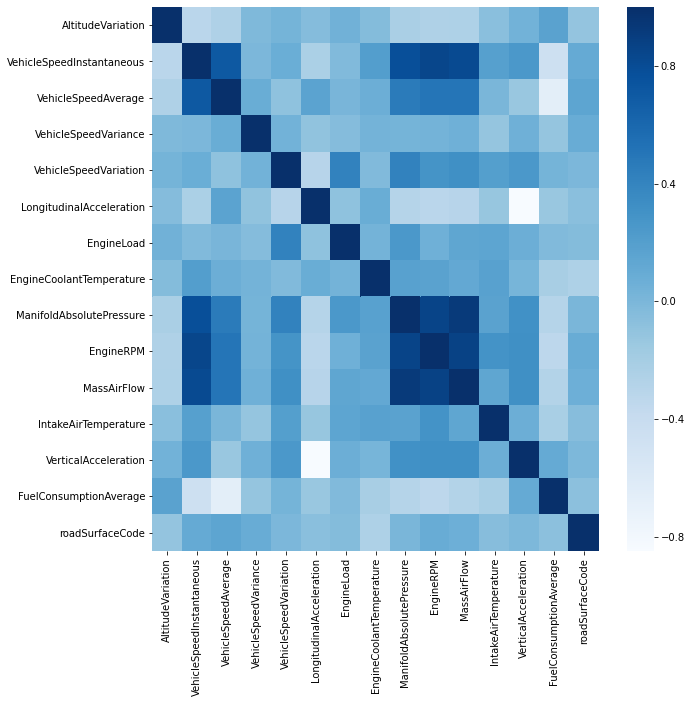

In [60]:
# using Spearman Correlation
plt.figure(figsize=(10,10))

# assign a variable cor
cor = corsa2.corr(method='spearman')

# create a heatmap in seaborn
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)